In [1]:
import scipy.spatial as spatial
import numpy as np
import matplotlib.pyplot as plt
from more_itertools import powerset
import mpl_toolkits.mplot3d as a3
from wireframes import wireframe_sphere
from rich import print

In [2]:
X = np.random.rand(7,3)
vor = spatial.Voronoi(X)

In [3]:
def cayley_menger_matrix(X):
    d = X.shape[1]
    dm = np.power(spatial.distance_matrix(X,X), 2)
    m = np.zeros(np.asarray(dm.shape) + 1)
    m[:,0] = 1
    m[0,:] = 1
    m[0,0] = 0
    m[1:,1:] = dm
    return m

The Cartesian coordinates of any point are a weighted average
of the Cartesian coordinates of the triangle's vertices,
with the weights being the point's barycentric coordinates summing to unity. So e.g. for a triangle:
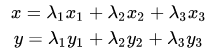

<IPython.core.display.Javascript object>


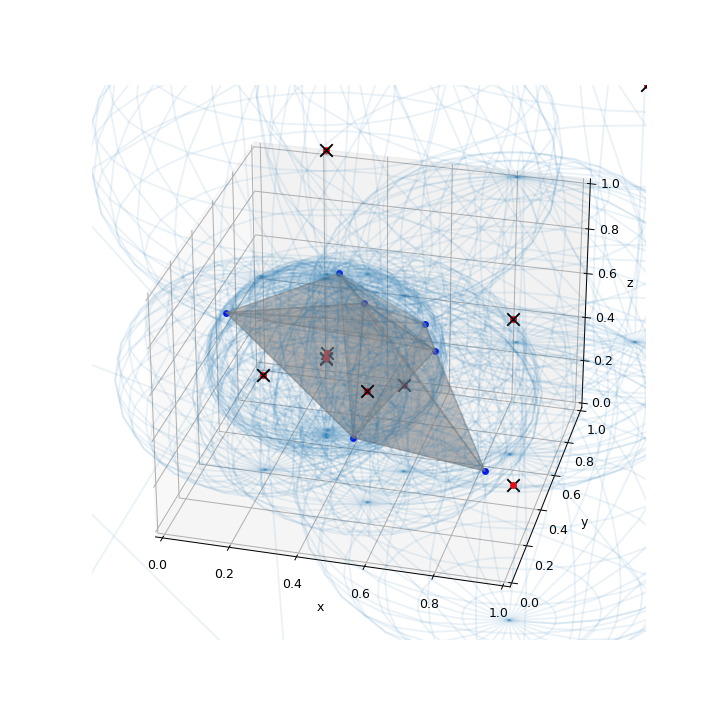

AttributeError: 'Axes3DSubplot' object has no attribute 'xticks'

In [5]:
%matplotlib notebook
tet = spatial.Delaunay(X)

tri = list()
for t in tet.simplices:
    for sf in [ sf for sf in  powerset(t) if len(sf) == 3]:
        tri.append(sf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = "3d")
vts = X[tri, :]
tri = a3.art3d.Poly3DCollection(vts)
tri.set_alpha(0.1)
tri.set_color('grey')
ax.add_collection3d(tri)

k = spatial.KDTree(X)
for i,v in enumerate(vor.vertices):
    ax.scatter(*tuple(v), color = "black", marker = "x", s = 100, alpha = 1)
    dists, neighbs = k.query(v, k = 4)
    assert np.allclose(dists, dists[0]), dists
    
    z = X[neighbs, :]
    cm_inv = np.linalg.inv(cayley_menger_matrix(z))
    baryc = cm_inv[1:,0]
    circumcentre = baryc.dot(z)
    ax.scatter(*tuple(circumcentre), color = "red")
    
    ax.plot_wireframe(*wireframe_sphere(v,dists[0]), alpha = 0.09)

for i,x in enumerate(X):
    ax.scatter(*tuple(x), color = "blue")
    
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()